In [1]:
"""灰度直方图"""
 
import numpy as np
import cv2
import matplotlib.pyplot as plt
#定义caleGrayHist函数来计算灰度直方图
def caleGrayHist(image):
    #灰度图像的高、宽
    rows, cols = image.shape
    #存储灰度直方图
    grayHist = np.zeros([256], np.uint64) #图像的灰度级范围是0~255      
    for r in range(rows):
        for c in range(cols):
            
            grayHist[image[r][c]] +=1
            
    return grayHist
 


In [2]:

img = cv2.imread('number0.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (100,181))

#计算灰度直方图
grayHist = caleGrayHist(img)
#画出直方图
x_range = range(256)
plt.plot(x_range, grayHist, 'r', linewidth=1.5, c='orange')
#设置坐标轴的范围
y_maxValue = np.max(grayHist)
plt.axis([0, 255, 0, y_maxValue]) #画图范围
plt.xlabel("gray Level")
plt.ylabel("number of pixels")
plt.show()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


C:\Users\guest1\AppData\Local\Temp\ipykernel_10208\3460193858.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_range, grayHist, 'r', linewidth=1.5, c='orange')


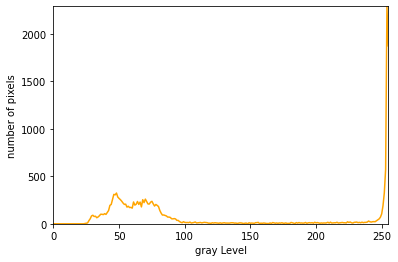

C:\Users\guest1\AppData\Local\Temp\ipykernel_10208\3460193858.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_range, grayHist, 'r', linewidth=1.5, c='orange')


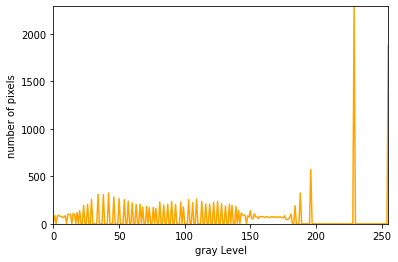

In [23]:

img = cv2.imread('image3.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (100,181))

#计算灰度直方图
grayHist = caleGrayHist(img)
#画出直方图
x_range = range(256)
plt.plot(x_range, grayHist, 'r', linewidth=1.5, c='orange')
#设置坐标轴的范围
y_maxValue = np.max(grayHist)
plt.axis([0, 255, 0, y_maxValue]) #画图范围
plt.xlabel("gray Level")
plt.ylabel("number of pixels")
plt.show()

chose = 3
if chose == 1:
    O = np.zeros_like(img)
    cv2.normalize(img, O, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) #公式
if chose == 2:
    # 对比度增加后
    #线性变换
    a = 2
    O = float(a) * img
    O[O>255] = 255 #大于255要截断为255
        
    #数据类型的转换
    O = np.round(O)
    O = O.astype(np.uint8)
if chose == 3:
    O = cv2.equalizeHist(img)

grayHist = caleGrayHist(O)
#画出直方图
x_range = range(256)
plt.plot(x_range, grayHist, 'r', linewidth=1.5, c='orange')
#设置坐标轴的范围
y_maxValue = np.max(grayHist)
plt.axis([0, 255, 0, y_maxValue]) #画图范围
plt.xlabel("gray Level")
plt.ylabel("number of pixels")
plt.show()

灰度级主要在0~150之间，造成图像对比度较低，要先判断出那些对比度低

原始的低对比度，低灰度的像素点的数量：

In [4]:
img = cv2.imread('number5.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (100,181))
i = 0
for x in range(181):
    for y in range(100):
        pixel = img[x,y]
        if 80 < pixel < 120:
            i = i + 1
print(i)

4999


提高对比度后，低灰度的像素点的数量：

In [5]:
img = cv2.imread('number5.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (100,181))
# 对比度增加后
#线性变换
a = 2
O = float(a) * img
O[O>255] = 255 #大于255要截断为255
    
#数据类型的转换
O = np.round(O)
O = O.astype(np.uint8)

i = 0
for x in range(181):
    for y in range(100):
        pixel = O[x,y]
        if 80 < pixel < 120:
            i = i + 1
print(i)


400


原始的高对比度，低灰度的像素点的数量：

In [24]:
img = cv2.imread('number0.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (100,181))
i = 0
for x in range(181):
    for y in range(100):
        pixel = img[x,y]
        if 80 < pixel < 120:
            i = i + 1
print(i)

746
